Installed Dash and other necessary libraries.

In [1]:
# Install a specific version of jupyter-dash and dash that are known to be compatible
# You might need to experiment with versions based on what's compatible with your Colab environment
!pip install dash==2.14.2 jupyter-dash==0.4.2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import os

from jupyter_dash import JupyterDash
from dash.dependencies import Input, Output

Mounted Google Drive and loaded CSV files from specified directories.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Writing a function to go to a directory and if .csv is there then add the file path to the dataframes array

In [4]:
def load_csv_from_directory(directory_path):
    dataframes = {}
    for file in os.listdir(directory_path):
        if file.endswith('.csv'):
            file_path = os.path.join(directory_path, file)
            dataframes[file] = pd.read_csv(file_path)
    return dataframes

Defining the directory path for both the directories

In [5]:
# Define directory paths
directory_1_path = '/content/drive/MyDrive/Python_Project/Dataset/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16'
directory_2_path = '/content/drive/MyDrive/Python_Project/Dataset/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16'

# Load CSV files from each directory
dataframes_dir1 = load_csv_from_directory(directory_1_path)
dataframes_dir2 = load_csv_from_directory(directory_2_path)

Concatenated DataFrames with the same names across two directories.

In [6]:
# dataframes_dir1 and dataframes_dir2 are dictionaries of DataFrames loaded from each directory
combined_dataframes = {}

# Get all unique keys from both directories
all_keys = set(dataframes_dir1.keys()).union(set(dataframes_dir2.keys()))

# Loop over each key and concatenate if present in both, or just add if present in one
for key in all_keys:
    if key in dataframes_dir1 and key in dataframes_dir2:
        # Concatenate DataFrames if the key exists in both directories
        combined_dataframes[key] = pd.concat([dataframes_dir1[key], dataframes_dir2[key]], ignore_index=True)
    elif key in dataframes_dir1:
        # Only in the first directory
        combined_dataframes[key] = dataframes_dir1[key]
    elif key in dataframes_dir2:
        # Only in the second directory
        combined_dataframes[key] = dataframes_dir2[key]

# Now, combined_dataframes will contain all DataFrames from both directories, with those having the same name merged across directories

In [7]:
print(combined_dataframes.keys())

dict_keys(['minuteIntensitiesNarrow_merged.csv', 'minuteMETsNarrow_merged.csv', 'minuteSleep_merged.csv', 'hourlyIntensities_merged.csv', 'hourlyCalories_merged.csv', 'minuteStepsNarrow_merged.csv', 'hourlySteps_merged.csv', 'dailyActivity_merged.csv', 'minuteStepsWide_merged.csv', 'dailySteps_merged.csv', 'minuteCaloriesWide_merged.csv', 'heartrate_seconds_merged.csv', 'weightLogInfo_merged.csv', 'sleepDay_merged.csv', 'dailyCalories_merged.csv', 'minuteCaloriesNarrow_merged.csv', 'dailyIntensities_merged.csv', 'minuteIntensitiesWide_merged.csv'])


In [8]:
sleep_day_df = combined_dataframes['sleepDay_merged.csv']
minute_sleep_df = combined_dataframes['minuteSleep_merged.csv']
daily_activity_df = combined_dataframes['dailyActivity_merged.csv']
weight_log_df = combined_dataframes['weightLogInfo_merged.csv']


Performing preliminary data inspection - including checking the dataset, statistical descriptions, missing values, and data types.

In [9]:
sleep_day_df.info()
minute_sleep_df.info()
daily_activity_df.info()
weight_log_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387080 entries, 0 to 387079
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Id      387080 non-null  int64 
 1   date    387080 non-null  object
 2   value   387080 non-null  int64 
 3   logId   387080 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 11.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1397 entries, 0 to 1396
Data columns (total 15 columns):
 #   Column        

Imputing with median of the column values in other dataframe items in case there is null value - which will be helpful if we need to use the dataframes in the latter part of the analysis.

In [10]:
for name, df in combined_dataframes.items():
    #Impute missing numeric values with the median
    for col in df.select_dtypes(include=np.number).columns:
        df[col].fillna(df[col].median(), inplace=True)

<ipython-input-10-2c3646af10a6>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [11]:
for name, df in combined_dataframes.items():
    print(f"Data types in {name}:")
    print(df.dtypes)
    print("\n")

Data types in minuteIntensitiesNarrow_merged.csv:
Id                 int64
ActivityMinute    object
Intensity          int64
dtype: object


Data types in minuteMETsNarrow_merged.csv:
Id                 int64
ActivityMinute    object
METs               int64
dtype: object


Data types in minuteSleep_merged.csv:
Id        int64
date     object
value     int64
logId     int64
dtype: object


Data types in hourlyIntensities_merged.csv:
Id                    int64
ActivityHour         object
TotalIntensity        int64
AverageIntensity    float64
dtype: object


Data types in hourlyCalories_merged.csv:
Id               int64
ActivityHour    object
Calories         int64
dtype: object


Data types in minuteStepsNarrow_merged.csv:
Id                 int64
ActivityMinute    object
Steps              int64
dtype: object


Data types in hourlySteps_merged.csv:
Id               int64
ActivityHour    object
StepTotal        int64
dtype: object


Data types in dailyActivity_merged.csv:
Id         

In [12]:
for name, df in combined_dataframes.items():
    if 'ActivityHour' in df.columns:
        try:
            df['ActivityHour'] = pd.to_datetime(df['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p')
        except ValueError:
            df['ActivityHour'] = pd.to_datetime(df['ActivityHour'], errors='coerce')  # Coerce errors will turn failures into NaT

    if 'SleepDay' in df.columns:
        try:
            df['SleepDay'] = pd.to_datetime(df['SleepDay'], format='%m/%d/%Y %I:%M:%S %p')
        except ValueError:
            df['SleepDay'] = pd.to_datetime(df['SleepDay'], errors='coerce')  # Coerce errors will turn failures into NaT

    if 'ActivityDay' in df.columns:
        try:
            df['ActivityDay'] = pd.to_datetime(df['ActivityDay'], format='%m/%d/%Y %I:%M:%S %p')
        except ValueError:
            df['ActivityDay'] = pd.to_datetime(df['ActivityDay'], errors='coerce')  # Coerce errors will turn failures into NaT

    # Converting 'ActivityDate' in 'dailyActivity_merged.csv'
    if 'ActivityDate' in df.columns:
        try:
            df['ActivityDate'] = pd.to_datetime(df['ActivityDate'], format='%m/%d/%Y %I:%M:%S %p')
        except ValueError:
            df['ActivityDate'] = pd.to_datetime(df['ActivityDate'], errors='coerce')

    # Converting 'Date' in 'weightLogInfo_merged.csv'
    if 'Date' in df.columns:
        try:
            df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M:%S %p')
        except ValueError:
            df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

    # Converting 'date' in 'minuteSleep_merged.csv'
    if 'date' in df.columns:
        try:
            df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y %I:%M:%S %p')
        except ValueError:
            df['date'] = pd.to_datetime(df['date'], errors='coerce')

    # Converting 'Time' in 'heartrate_seconds_merged.csv'
    if 'Time' in df.columns:
        try:
            df['Time'] = pd.to_numeric(df['Time'])
        except ValueError:
            df['Time'] = pd.to_numeric(df['Time'], errors='coerce')

    # Converting 'ActivityMinute' in 'minuteMETsNarrow_merged.csv'
    if 'ActivityMinute' in df.columns:
        try:
            df['ActivityMinute'] = pd.to_numeric(df['ActivityMinute'])
        except ValueError:
            df['ActivityMinute'] = pd.to_numeric(df['ActivityMinute'], errors='coerce')

Checking datatypes again

In [13]:
for name, df in combined_dataframes.items():
    print(f"Updated data types for {name}:")
    print(df.dtypes)
    print("\n")

Updated data types for minuteIntensitiesNarrow_merged.csv:
Id                  int64
ActivityMinute    float64
Intensity           int64
dtype: object


Updated data types for minuteMETsNarrow_merged.csv:
Id                  int64
ActivityMinute    float64
METs                int64
dtype: object


Updated data types for minuteSleep_merged.csv:
Id                int64
date     datetime64[ns]
value             int64
logId             int64
dtype: object


Updated data types for hourlyIntensities_merged.csv:
Id                           int64
ActivityHour        datetime64[ns]
TotalIntensity               int64
AverageIntensity           float64
dtype: object


Updated data types for hourlyCalories_merged.csv:
Id                       int64
ActivityHour    datetime64[ns]
Calories                 int64
dtype: object


Updated data types for minuteStepsNarrow_merged.csv:
Id                  int64
ActivityMinute    float64
Steps               int64
dtype: object


Updated data types for hour

Checking number of participants in each dataset

In [14]:
{
    'sleep_day_df': sleep_day_df['Id'].nunique(),
    'minute_sleep_df': minute_sleep_df['Id'].nunique(),
    'daily_activity_df': daily_activity_df['Id'].nunique(),
    'weight_log_df': weight_log_df['Id'].nunique()
}

{'sleep_day_df': 24,
 'minute_sleep_df': 25,
 'daily_activity_df': 35,
 'weight_log_df': 13}

Only 13 participants in the weight log dataset so not considering it for now

Renaming and reformatting necessary columns

In [15]:
daily_activity_df.rename(columns={'FairlyActiveMinutes': 'ModeratelyActive'}, inplace=True)
daily_activity_df.rename(columns={'VeryActiveMinutes': 'VeryActive'}, inplace=True)
daily_activity_df.rename(columns={'LightlyActiveMinutes': 'LightlyActive'}, inplace=True)
daily_activity_df.rename(columns={'SedentaryMinutes': 'Inactive/Device not in use'}, inplace=True)
daily_activity_df.head()
#sleep_day_df.rename(columns={'SleepDay': 'ActivityDate'}, inplace=True)
#sleep_day_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActive,ModeratelyActive,LightlyActive,Inactive/Device not in use,Calories
0,1503960366,2016-03-25,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,2016-03-26,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,2016-03-27,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,2016-03-28,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,2016-03-29,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


CONVERSION OF MINS TO HOURS FOR BETTER UNDERSTANDING

In [16]:
sleep_day_df['TotalMinutesAsleep'] = sleep_day_df['TotalMinutesAsleep'] / 60
sleep_day_df['TotalTimeInBed'] = sleep_day_df['TotalTimeInBed'] / 60

Pairwise correlation to see how each of these columns are correlated

Filtering data for only April 12 to May 12th as sleep data is only from april and so to bring uniformity for our analysis

In [17]:
common_ids = set(daily_activity_df['Id']).intersection(set(sleep_day_df['Id']))
#, set(weight_log_df['Id']))
print(f"Common IDs across all datasets: {common_ids}")

# Filter each dataset to only include common IDs
common_activity = daily_activity_df[daily_activity_df['Id'].isin(common_ids)]
common_sleep = sleep_day_df[sleep_day_df['Id'].isin(common_ids)]
#common_weight = weight_log_df[weight_log_df['Id'].isin(common_ids)]

# Print out date ranges for these filtered datasets
print("Activity Date Range:", common_activity['ActivityDate'].min(), common_activity['ActivityDate'].max())
print("Sleep Date Range:", common_sleep['SleepDay'].min(), common_sleep['SleepDay'].max())
#print("Weight Date Range:", common_weight['Date'].min(), common_weight['Date'].max())


# Filter data to common date range
#start_date = '2016-04-12'
#end_date = '2016-05-12'

# Using left join initially to see the output
test_merge = pd.merge(daily_activity_df, sleep_day_df, how='left', left_on=['Id', 'ActivityDate'], right_on=['Id', 'SleepDay'])
#test_merge = pd.merge(test_merge, weight_log_df, how='left', left_on=['Id', 'ActivityDate'], right_on=['Id', 'Date'])

# Check how many rows are filled
print(test_merge.info())


Common IDs across all datasets: {8053475328, 1644430081, 8378563200, 4558609924, 4319703577, 2320127002, 2026352035, 7007744171, 1503960366, 2347167796, 1927972279, 4388161847, 6775888955, 8792009665, 5553957443, 7086361926, 6962181067, 3977333714, 4702921684, 5577150313, 4020332650, 4445114986, 1844505072, 6117666160}
Activity Date Range: 2016-03-12 00:00:00 2016-05-12 00:00:00
Sleep Date Range: 2016-04-12 00:00:00 2016-05-12 00:00:00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Id                          1400 non-null   int64         
 1   ActivityDate                1400 non-null   datetime64[ns]
 2   TotalSteps                  1400 non-null   int64         
 3   TotalDistance               1400 non-null   float64       
 4   TrackerDistance             1400 non-null   float64       
 5   

In order to better understand sleep habits of fitbit users; lets divide them into 4 groups based on which defines the optimal sleep between 7-9 hrs

excess >9hrs ; good 7-9 hrs; Deprived <7hrs

In [18]:
# Ensure that 'TotalMinutesAsleep' is in hours if not already converted
sleep_day_df['hours'] = sleep_day_df['TotalMinutesAsleep']  # Assuming TotalMinutesAsleep has already been converted to hours

# Creating bins for the 'hours' of sleep
bins = [sleep_day_df['hours'].min(), 7, 9, sleep_day_df['hours'].max()]
labels = ['deprived', 'good', 'excess']

# Categorizing sleep data into bins
sleep_day_df['SleepBins'] = pd.cut(sleep_day_df['hours'],
                                   bins=bins,
                                   labels=labels,
                                   include_lowest=True,
                                   right=False)

# Checking the first few entries of the new 'SleepBins' column
print(sleep_day_df[['hours', 'SleepBins']])

# Summary of the distribution of sleep categories
print(sleep_day_df['SleepBins'].value_counts())


         hours SleepBins
0     5.450000  deprived
1     6.400000  deprived
2     6.866667  deprived
3     5.666667  deprived
4    11.666667    excess
..         ...       ...
408   5.716667  deprived
409   8.383333      good
410   6.916667  deprived
411   8.600000      good
412   7.316667      good

[413 rows x 2 columns]
SleepBins
good        192
deprived    182
excess       38
Name: count, dtype: int64


In [19]:
import plotly.graph_objects as go

# Prepare the data for the pie chart
sleep_bins_count = sleep_day_df['SleepBins'].value_counts().reset_index()
sleep_bins_count.columns = ['SleepBins', 'Count']

# Create a 3D-like Pie Chart with light theme and colors
fig = go.Figure()

fig.add_trace(go.Pie(
    labels=sleep_bins_count['SleepBins'],
    values=sleep_bins_count['Count'],
    hole=0.4,  # For a donut chart effect
    pull=[0.1, 0, 0, 0],  # Emphasize the first slice
    textinfo='label+percent',
    insidetextorientation='radial',
    marker=dict(
        colors=['#ffcccb', '#d4e157', '#ffd700', '#00aaff'],  # Light pastel colors
        line=dict(color='#FFFFFF', width=2)  # White borders for contrast
    )
))

fig.update_traces(
    hoverinfo='label+percent+value',
    textfont_size=15,
    textposition='inside'
)

fig.update_layout(
    title="Distribution of Sleep Bins",
    template="plotly_white",  # Light theme template
    showlegend=True,
    annotations=[dict(text='Sleep Bins', x=0.5, y=0.5, font_size=20, showarrow=False)]
)

fig.show()


# Checking Sleep bins and its outliers for further analysis

<ipython-input-20-14a8c6a2dc27>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




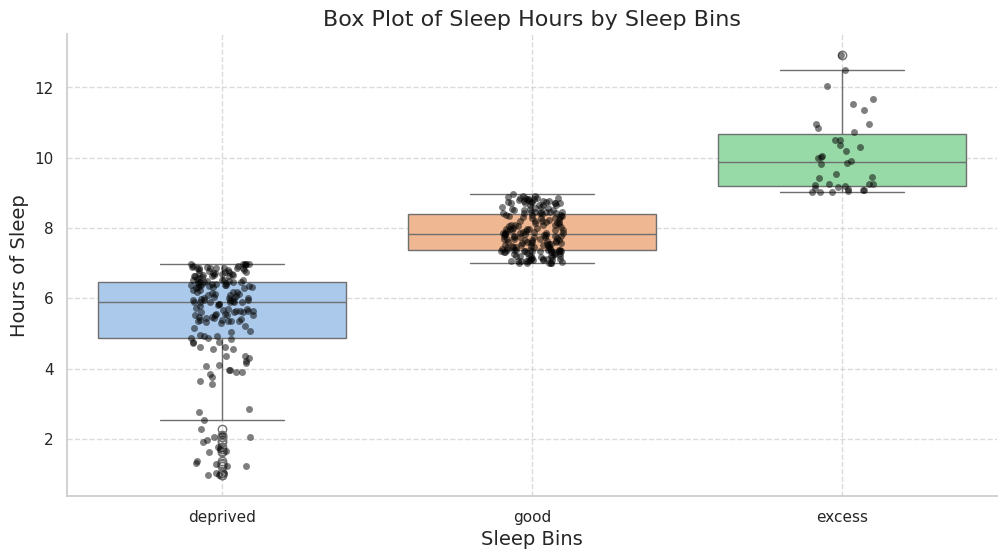

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the theme for the plot
sns.set_theme(style="whitegrid")

# Create the box plot with overlayed individual points
plt.figure(figsize=(12, 6))
sns.boxplot(x='SleepBins', y='hours', data=sleep_day_df, palette='pastel')
sns.stripplot(x='SleepBins', y='hours', data=sleep_day_df, color='black', alpha=0.5)

# Add titles and labels
plt.title('Box Plot of Sleep Hours by Sleep Bins', fontsize=16)
plt.xlabel('Sleep Bins', fontsize=14)
plt.ylabel('Hours of Sleep', fontsize=14)

# Customize grid and background
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

Removing outliers - 3 or less hrs of sleep as its unusual so exclude those with less than 3 hrs of sleep

In [21]:
sleep_day_df = sleep_day_df[sleep_day_df['hours'] > 3].copy()
#sns.countplot(x='SleepBins', data=sleep_day_df)
#plt.title('Distribution of Sleep Bins')
#plt.xlabel('Sleep Bins')
#plt.ylabel('Count')
#plt.show()

In [22]:
# Create a DataFrame from value_counts and reset the index
#sleep_bins_df = sleep_day_df['SleepBins'].value_counts().reset_index()
#sleep_bins_df.columns = ['SleepBins', 'count']  # Rename columns for clarity

# Now create the bar plot with the corrected column names
#fig_sleep_bins = px.bar(sleep_bins_df,
                     #   x='SleepBins',
                      #  y='count',
                      #  labels={'SleepBins': 'Sleep Bins', 'count': 'Count'},
                      #  title='Distribution of Sleep Bins')


## SLEEP AND ACTIVITY

In [23]:
import dash
from dash import dcc  # Import dcc from dash
from dash import html # Import html from dash
# The rest of your code
from dash.dependencies import Input, Output

In [24]:
# Create the Dash app
app = JupyterDash(__name__)

# Define the layout of the dashboard
app.layout = html.Div([
    html.H2("Sleep and Activity Analysis Dashboard"),

    # Time picker
    dcc.DatePickerRange(
        id='date-picker-range',
        min_date_allowed=sleep_day_df['SleepDay'].min(),
        max_date_allowed=sleep_day_df['SleepDay'].max(),
        start_date=sleep_day_df['SleepDay'].min(),
        end_date=sleep_day_df['SleepDay'].max()
    ),

    # Dropdown to select panel
    dcc.Dropdown(
        id='panel-dropdown',
        options=[
            {'label': 'Sleep Distribution', 'value': 'panel1'},
            {'label': 'Activity Type vs Day of Week', 'value': 'panel2'},
            {'label': 'Total Activity vs Total Steps', 'value': 'panel3'},
        ],
        value='panel1',  # Default to panel 1
    ),

    # Placeholder for the dynamic content
    dcc.Graph(id='dynamic-panel')
])

# Callback to update the panel based on dropdown selection
@app.callback(
    Output('dynamic-panel', 'figure'),
    [Input('panel-dropdown', 'value'),
     Input('date-picker-range', 'start_date'),
     Input('date-picker-range', 'end_date')]
)
def update_panel(panel, start_date, end_date):
    filtered_activity = daily_activity_df[(daily_activity_df['ActivityDate'] >= pd.to_datetime(start_date)) &
                                          (daily_activity_df['ActivityDate'] <= pd.to_datetime(end_date))]

    filtered_sleep = sleep_day_df[(sleep_day_df['SleepDay'] >= pd.to_datetime(start_date)) &
                                  (sleep_day_df['SleepDay'] <= pd.to_datetime(end_date))]

    if panel == 'panel1':
        # Sleep Distribution (SleepBins vs Count)
        sleep_bins_count = filtered_sleep['SleepBins'].value_counts().reset_index()
        sleep_bins_count.columns = ['SleepBins', 'Count']
        fig = px.bar(sleep_bins_count, x='SleepBins', y='Count', title='Sleep Bins Distribution')

    elif panel == 'panel2':
        # Activity Type vs Day of the Week
        filtered_activity['DayOfWeek'] = filtered_activity['ActivityDate'].dt.day_name()
        filtered_activity['WeekPart'] = filtered_activity['DayOfWeek'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')
        activity_vs_day = filtered_activity.groupby(['WeekPart', 'DayOfWeek']).mean().reset_index()
        fig = px.bar(activity_vs_day,
                     x='DayOfWeek',
                     y=['LightlyActive', 'ModeratelyActive', 'VeryActive'],
                     title='Activity Type vs Day of Week',
                     barmode='group')

    elif panel == 'panel3':
        # Total Activity vs Total Steps
        filtered_activity['TotalActivity'] = (filtered_activity['LightlyActive'] +
                                              filtered_activity['ModeratelyActive'] +
                                              filtered_activity['VeryActive'])
        fig = px.scatter(filtered_activity,
                         x='TotalActivity',
                         y='TotalSteps',
                         color='TotalSteps',
                         title='Total Activity vs Total Steps')

    return fig



/usr/local/lib/python3.11/dist-packages/dash/dash.py:538: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



In [27]:
# Run the app
app.run_server(mode='inline', debug=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>